In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')

In [6]:
pd.set_option('display.max_columns',None)

In [7]:
print(df.shape)

(771066, 49)


In [ ]:
#Reduce Dataset down to Crashes in just 2022 that had reported injuries > 0

In [5]:
df.dtypes

CRASH_RECORD_ID                   object
RD_NO                             object
CRASH_DATE_EST_I                  object
CRASH_DATE                        object
POSTED_SPEED_LIMIT                 int64
TRAFFIC_CONTROL_DEVICE            object
DEVICE_CONDITION                  object
WEATHER_CONDITION                 object
LIGHTING_CONDITION                object
FIRST_CRASH_TYPE                  object
TRAFFICWAY_TYPE                   object
LANE_CNT                         float64
ALIGNMENT                         object
ROADWAY_SURFACE_COND              object
ROAD_DEFECT                       object
REPORT_TYPE                       object
CRASH_TYPE                        object
INTERSECTION_RELATED_I            object
NOT_RIGHT_OF_WAY_I                object
HIT_AND_RUN_I                     object
DAMAGE                            object
DATE_POLICE_NOTIFIED              object
PRIM_CONTRIBUTORY_CAUSE           object
SEC_CONTRIBUTORY_CAUSE            object
STREET_NO       

In [123]:
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])

In [124]:
 df = df[df['CRASH_DATE'].dt.year == 2022]

In [125]:
df = df[df['INJURIES_TOTAL'] != 0]

In [126]:
df.dropna(subset=['INJURIES_TOTAL'], inplace=True)

In [10]:
print(df.shape)

(16032, 49)


In [127]:
df.reset_index(drop=True, inplace=True)

In [ ]:
#Remove columns that will not be used

In [137]:
df = df.drop(['CRASH_RECORD_ID','CRASH_DATE_EST_I', 'ALIGNMENT','REPORT_TYPE','NOT_RIGHT_OF_WAY_I','BEAT_OF_OCCURRENCE',
              'PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_TYPE','WORKERS_PRESENT_I','CRASH_TYPE','INTERSECTION_RELATED_I',
              'SEC_CONTRIBUTORY_CAUSE','MOST_SEVERE_INJURY','INJURIES_UNKNOWN','CRASH_HOUR',
              'LOCATION','DEVICE_CONDITION','ROAD_DEFECT','LANE_CNT'], axis = 1)

In [ ]:
df=df.drop(['LATITUDE','LONGITUDE'],axis=1)

In [139]:
df

,ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_SIGN,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ROAD_CONDITION,HIT_AND_RUN,DAMAGE_ESTIMATE,DATE_POLICE_NOTIFIED,CAUSE_OF_ACCIDENT,STREET_NO,STREET_DIRECTION,STREET_NAME,WORK_ZONE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,JF486690,2022-11-25 00:00:00,25,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",FOUR WAY,DRY,Y,"OVER $1,500",2022-11-25 00:03:00,FAILING TO YIELD RIGHT-OF-WAY,4900,S,MICHIGAN AVE,N,5,3,0,2,1,0,2,6,11
1,JF527711,2022-12-30 15:40:00,25,NO CONTROLS,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,Y,"OVER $1,500",2022-12-30 15:40:00,UNABLE TO DETERMINE,1000,S,KOSTNER AVE,N,3,1,0,0,1,0,3,6,12
2,JF223730,2022-04-29 00:05:00,30,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",NOT DIVIDED,DRY,Y,"OVER $1,500",2022-04-29 00:08:00,UNABLE TO DETERMINE,510,N,CICERO AVE,N,3,1,0,0,1,0,4,6,4
3,JF252632,2022-05-23 12:38:00,30,NO CONTROLS,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,N,"OVER $1,500",2022-05-23 12:54:00,UNABLE TO DETERMINE,10904,S,EWING AVE,N,2,1,0,1,0,0,2,2,5
4,JF210064,2022-04-16 10:36:00,30,NO CONTROLS,CLEAR,DAYLIGHT,DIVIDED - W/MEDIAN (NOT RAISED),DRY,N,"$501 - $1,500",2022-04-16 10:36:00,"EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",6250,N,LINCOLN AVE,N,2,1,0,1,0,0,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16027,JF210763,2022-04-17 14:54:00,30,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,N,$500 OR LESS,2022-04-17 14:54:00,FAILING TO YIELD RIGHT-OF-WAY,4500,N,HAZEL ST,N,2,2,1,0,1,0,5,1,4
16028,JF141863,2022-02-12 00:45:00,40,NO CONTROLS,CLEAR,DARKNESS,OTHER,UNKNOWN,N,"OVER $1,500",2022-02-12 00:51:00,UNABLE TO DETERMINE,3900,N,LAKE SHORE DR,N,3,3,0,0,2,1,2,7,2
16029,JF135261,2022-02-06 01:49:00,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",DIVIDED - W/MEDIAN BARRIER,DRY,Y,"OVER $1,500",2022-02-06 01:54:00,FAILING TO REDUCE SPEED TO AVOID CRASH,5649,N,LAKE SHORE DR SB,N,2,1,0,0,0,1,3,1,2
16030,JF279207,2022-06-14 11:20:00,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,N,"OVER $1,500",2022-06-14 11:31:00,IMPROPER TURNING/NO SIGNAL,4758,W,FLOURNOY ST,N,2,2,0,0,0,2,2,3,6


In [45]:
df.dtypes

ID                                       object
CRASH_DATE                       datetime64[ns]
POSTED_SPEED_LIMIT                        int64
TRAFFIC_SIGN                             object
WEATHER_CONDITION                        object
LIGHTING_CONDITION                       object
CRASH_TYPE                               object
TRAFFICWAY_TYPE                          object
ROAD_CONDITION                           object
HIT_AND_RUN                              object
DAMAGE_ESTIMATE                          object
DATE_POLICE_NOTIFIED             datetime64[ns]
CAUSE_OF_ACCIDENT                        object
STREET_NO                                 int64
STREET_DIRECTION                         object
STREET_NAME                              object
WORK_ZONE                                object
NUM_UNITS                                 int64
INJURIES_TOTAL                            int64
INJURIES_FATAL                            int64
INJURIES_INCAPACITATING                 

In [ ]:
#Rename Columns

In [129]:
column_rename = {'RD_NO': 'ID', 'POSTED_SPEED_LIMIT ': 'SPEED_LIMIT',
                 'TRAFFIC_CONTROL_DEVICE': 'TRAFFIC_SIGN',
                 'FIRST_CRASH_TYPE': 'CRASH_TYPE', 'ROADWAY_SURFACE_COND': 'ROAD_CONDITION',
                 'HIT_AND_RUN_I': 'HIT_AND_RUN','DAMAGE': 'DAMAGE_ESTIMATE',
                 'PRIM_CONTRIBUTORY_CAUSE' : 'CAUSE_OF_ACCIDENT', 'WORK_ZONE_I' : 'WORK_ZONE'}

df.rename(columns=column_rename, inplace=True)

In [ ]:
#Delete duplicates

In [130]:
df = df.drop_duplicates()

In [47]:
print(df.shape)

(16032, 26)


In [ ]:
#Convert Data Types

In [48]:
df.dtypes

ID                                       object
CRASH_DATE                       datetime64[ns]
POSTED_SPEED_LIMIT                        int64
TRAFFIC_SIGN                             object
WEATHER_CONDITION                        object
LIGHTING_CONDITION                       object
CRASH_TYPE                               object
TRAFFICWAY_TYPE                          object
ROAD_CONDITION                           object
HIT_AND_RUN                              object
DAMAGE_ESTIMATE                          object
DATE_POLICE_NOTIFIED             datetime64[ns]
CAUSE_OF_ACCIDENT                        object
STREET_NO                                 int64
STREET_DIRECTION                         object
STREET_NAME                              object
WORK_ZONE                                object
NUM_UNITS                                 int64
INJURIES_TOTAL                            int64
INJURIES_FATAL                            int64
INJURIES_INCAPACITATING                 

In [131]:
data_types = {'INJURIES_TOTAL': int, 'INJURIES_FATAL': int, 'INJURIES_INCAPACITATING' : int,
              'INJURIES_NON_INCAPACITATING' : int,'INJURIES_REPORTED_NOT_EVIDENT' : int,
             'INJURIES_NO_INDICATION': int}
df = df.astype(data_types)

In [132]:
df['DATE_POLICE_NOTIFIED'] = pd.to_datetime(df['DATE_POLICE_NOTIFIED'])

In [ ]:
#Check for nulls and fix accordingly

In [51]:
df.dtypes

ID                                       object
CRASH_DATE                       datetime64[ns]
POSTED_SPEED_LIMIT                        int64
TRAFFIC_SIGN                             object
WEATHER_CONDITION                        object
LIGHTING_CONDITION                       object
CRASH_TYPE                               object
TRAFFICWAY_TYPE                          object
ROAD_CONDITION                           object
HIT_AND_RUN                              object
DAMAGE_ESTIMATE                          object
DATE_POLICE_NOTIFIED             datetime64[ns]
CAUSE_OF_ACCIDENT                        object
STREET_NO                                 int64
STREET_DIRECTION                         object
STREET_NAME                              object
WORK_ZONE                                object
NUM_UNITS                                 int64
INJURIES_TOTAL                            int64
INJURIES_FATAL                            int64
INJURIES_INCAPACITATING                 

In [52]:
df.isnull().any()

ID                               False
CRASH_DATE                       False
POSTED_SPEED_LIMIT               False
TRAFFIC_SIGN                     False
WEATHER_CONDITION                False
LIGHTING_CONDITION               False
CRASH_TYPE                       False
TRAFFICWAY_TYPE                  False
ROAD_CONDITION                   False
HIT_AND_RUN                       True
DAMAGE_ESTIMATE                  False
DATE_POLICE_NOTIFIED             False
CAUSE_OF_ACCIDENT                False
STREET_NO                        False
STREET_DIRECTION                 False
STREET_NAME                      False
WORK_ZONE                         True
NUM_UNITS                        False
INJURIES_TOTAL                   False
INJURIES_FATAL                   False
INJURIES_INCAPACITATING          False
INJURIES_NON_INCAPACITATING      False
INJURIES_REPORTED_NOT_EVIDENT    False
INJURIES_NO_INDICATION           False
CRASH_DAY_OF_WEEK                False
CRASH_MONTH              

In [133]:
df['HIT_AND_RUN'] = df['HIT_AND_RUN'].fillna('N')

In [134]:
df['WORK_ZONE'] = df['WORK_ZONE'].fillna('N')

In [60]:
df.isnull().any()

ID                               False
CRASH_DATE                       False
POSTED_SPEED_LIMIT               False
TRAFFIC_SIGN                     False
WEATHER_CONDITION                False
LIGHTING_CONDITION               False
CRASH_TYPE                       False
TRAFFICWAY_TYPE                  False
ROAD_CONDITION                   False
HIT_AND_RUN                      False
DAMAGE_ESTIMATE                  False
DATE_POLICE_NOTIFIED             False
CAUSE_OF_ACCIDENT                False
STREET_NO                        False
STREET_DIRECTION                 False
STREET_NAME                      False
WORK_ZONE                        False
NUM_UNITS                        False
INJURIES_TOTAL                   False
INJURIES_FATAL                   False
INJURIES_INCAPACITATING          False
INJURIES_NON_INCAPACITATING      False
INJURIES_REPORTED_NOT_EVIDENT    False
INJURIES_NO_INDICATION           False
CRASH_DAY_OF_WEEK                False
CRASH_MONTH              

In [159]:
df

,ID,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_SIGN,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ROAD_CONDITION,HIT_AND_RUN,DAMAGE_ESTIMATE,DATE_POLICE_NOTIFIED,CAUSE_OF_ACCIDENT,STREET_NO,STREET_DIRECTION,STREET_NAME,WORK_ZONE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,JF486690,2022-11-25 00:00:00,25,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",FOUR WAY,DRY,Y,"OVER $1,500",2022-11-25 00:03:00,FAILING TO YIELD RIGHT-OF-WAY,4900,S,MICHIGAN AVE,N,5,3,0,2,1,0,2,6,11
1,JF527711,2022-12-30 15:40:00,25,NO CONTROLS,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,Y,"OVER $1,500",2022-12-30 15:40:00,UNABLE TO DETERMINE,1000,S,KOSTNER AVE,N,3,1,0,0,1,0,3,6,12
2,JF223730,2022-04-29 00:05:00,30,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",NOT DIVIDED,DRY,Y,"OVER $1,500",2022-04-29 00:08:00,UNABLE TO DETERMINE,510,N,CICERO AVE,N,3,1,0,0,1,0,4,6,4
3,JF252632,2022-05-23 12:38:00,30,NO CONTROLS,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,N,"OVER $1,500",2022-05-23 12:54:00,UNABLE TO DETERMINE,10904,S,EWING AVE,N,2,1,0,1,0,0,2,2,5
4,JF210064,2022-04-16 10:36:00,30,NO CONTROLS,CLEAR,DAYLIGHT,DIVIDED - W/MEDIAN (NOT RAISED),DRY,N,"$501 - $1,500",2022-04-16 10:36:00,"EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",6250,N,LINCOLN AVE,N,2,1,0,1,0,0,2,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16027,JF210763,2022-04-17 14:54:00,30,STOP SIGN/FLASHER,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,N,$500 OR LESS,2022-04-17 14:54:00,FAILING TO YIELD RIGHT-OF-WAY,4500,N,HAZEL ST,N,2,2,1,0,1,0,5,1,4
16028,JF141863,2022-02-12 00:45:00,40,NO CONTROLS,CLEAR,DARKNESS,OTHER,UNKNOWN,N,"OVER $1,500",2022-02-12 00:51:00,UNABLE TO DETERMINE,3900,N,LAKE SHORE DR,N,3,3,0,0,2,1,2,7,2
16029,JF135261,2022-02-06 01:49:00,30,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",DIVIDED - W/MEDIAN BARRIER,DRY,Y,"OVER $1,500",2022-02-06 01:54:00,FAILING TO REDUCE SPEED TO AVOID CRASH,5649,N,LAKE SHORE DR SB,N,2,1,0,0,0,1,3,1,2
16030,JF279207,2022-06-14 11:20:00,30,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,NOT DIVIDED,DRY,N,"OVER $1,500",2022-06-14 11:31:00,IMPROPER TURNING/NO SIGNAL,4758,W,FLOURNOY ST,N,2,2,0,0,0,2,2,3,6


In [64]:
#How many total injuries from crashes with injuries?

In [136]:
print(df.shape)

(16032, 47)


In [67]:
sum_of_injueries = df['INJURIES_TOTAL'].sum()
sum_of_injueries

22086

In [68]:
#how many fatalities

In [69]:
sum_of_fatalities = df['INJURIES_FATAL'].sum()
sum_of_fatalities

150

In [76]:
#Fatality count by day of the week (1= Sunday)

In [77]:
fatality_weekday = df.groupby('CRASH_DAY_OF_WEEK')['INJURIES_FATAL'].sum()
fatality_weekday

CRASH_DAY_OF_WEEK
1    28
2    22
3    11
4    18
5    23
6    20
7    28
Name: INJURIES_FATAL, dtype: int64

<Axes: xlabel='CRASH_DAY_OF_WEEK', ylabel='count'>

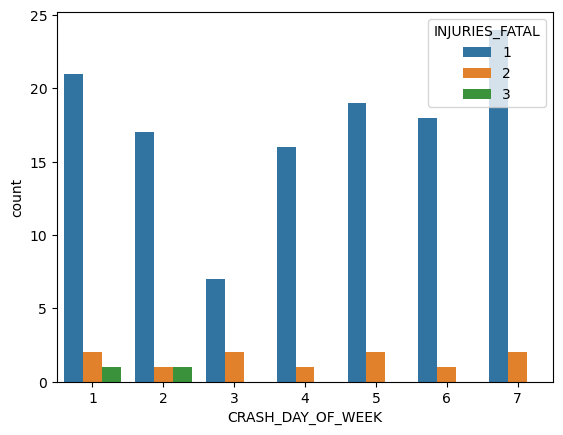

In [198]:
filtered_df = df[df['INJURIES_FATAL'].isin([1, 2, 3])]
sns.countplot(data= filtered_df, x='CRASH_DAY_OF_WEEK', hue='INJURIES_FATAL')


In [ ]:
#Fatality count by month (1= January)

In [78]:
fatality_month = df.groupby('CRASH_MONTH')['INJURIES_FATAL'].sum()
fatality_month

CRASH_MONTH
1     12
2     14
3     11
4     11
5      9
6      8
7     19
8     12
9     15
10    11
11    10
12    18
Name: INJURIES_FATAL, dtype: int64

<Axes: xlabel='CRASH_MONTH', ylabel='INJURIES_FATAL'>

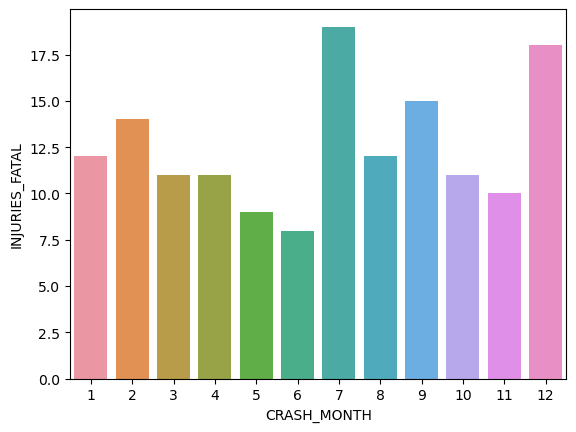

In [214]:
fatality_month = df.groupby('CRASH_MONTH')['INJURIES_FATAL'].sum().reset_index()
sns.barplot(data=fatality_month, x='CRASH_MONTH', y='INJURIES_FATAL')

In [70]:
#aveage number of units involed (car or person = 1 unit)

In [75]:
avg_units = round(df['NUM_UNITS'].mean(),0)
avg_units

2.0

In [ ]:
#Crash Injuries by weather condition

In [81]:
Weather = df.groupby('WEATHER_CONDITION').size()
Weather

WEATHER_CONDITION
BLOWING SNOW                 31
CLEAR                     12880
CLOUDY/OVERCAST             484
FOG/SMOKE/HAZE               20
FREEZING RAIN/DRIZZLE        79
OTHER                        82
RAIN                       1516
SEVERE CROSS WIND GATE        2
SLEET/HAIL                   17
SNOW                        536
UNKNOWN                     385
dtype: int64

In [ ]:
#Crash Injuries by lighting condition

In [82]:
Lighting = df.groupby('LIGHTING_CONDITION').size()
Lighting

LIGHTING_CONDITION
DARKNESS                   624
DARKNESS, LIGHTED ROAD    4676
DAWN                       284
DAYLIGHT                  9742
DUSK                       457
UNKNOWN                    249
dtype: int64

In [ ]:
#Top 5 Crash Injuries by Cause

In [85]:
Cause = df.groupby('CAUSE_OF_ACCIDENT').size()
Top5Cause = Cause.nlargest(5)
Top5Cause

CAUSE_OF_ACCIDENT
UNABLE TO DETERMINE                       5209
FAILING TO YIELD RIGHT-OF-WAY             2977
FOLLOWING TOO CLOSELY                     1088
FAILING TO REDUCE SPEED TO AVOID CRASH    1077
DISREGARDING TRAFFIC SIGNALS               968
dtype: int64

In [ ]:
#Bottom 5 Crash Injuries by Cause

In [86]:
Cause = df.groupby('CAUSE_OF_ACCIDENT').size()
Bot5Cause = Cause.nsmallest(5)
Bot5Cause

CAUSE_OF_ACCIDENT
MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT    1
BICYCLE ADVANCING LEGALLY ON RED LIGHT       3
TEXTING                                      4
ANIMAL                                       6
OBSTRUCTED CROSSWALKS                        8
dtype: int64

In [89]:
#Top 3 Crash Injuries by speed limit

In [92]:
Speed = df.groupby('POSTED_SPEED_LIMIT').size()
Top3Speed = Speed.nlargest(3)
Top3Speed

POSTED_SPEED_LIMIT
30    12558
35     1243
25      843
dtype: int64

<Axes: xlabel='POSTED_SPEED_LIMIT', ylabel='count'>

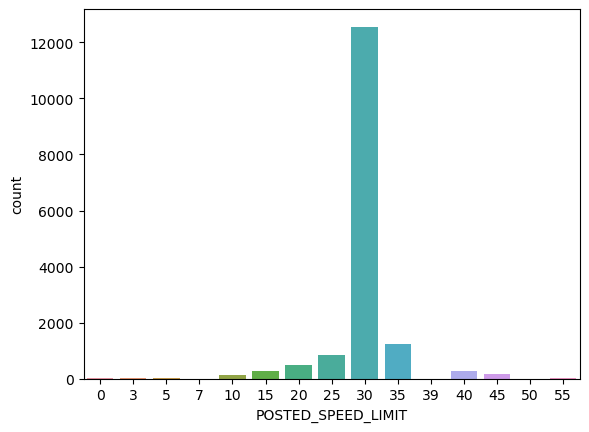

In [175]:
sns.countplot(x='POSTED_SPEED_LIMIT', data= df)

In [ ]:
#Top 5 Crash Injuries by Crash Type

In [94]:
CrashType = df.groupby('CRASH_TYPE').size()
Top5Type = CrashType.nlargest(5)
Top5Type

CRASH_TYPE
REAR END        3018
ANGLE           2931
TURNING         2829
PEDESTRIAN      2183
PEDALCYCLIST    1240
dtype: int64

In [ ]:
#Hit and Runs that were fatal. 1st out put is count. 2nd output is fatal counts

In [103]:
HitRun = df.groupby('HIT_AND_RUN').size()
HitRun

HIT_AND_RUN
N    12231
Y     3801
dtype: int64

In [109]:
condition = df[(df['HIT_AND_RUN'] == 'Y') & (df['INJURIES_FATAL'] > 0)]
fatalhit = len(condition)
fatalhit

26

In [ ]:
#Average amount of time in minutes between when the crash occurred and when police were contacted

In [112]:
timediff = round(((df['DATE_POLICE_NOTIFIED'] - df['CRASH_DATE']).dt.total_seconds() / 60).mean(),0)
timediff

332.0

In [ ]:
#5 hours average seems skewed by outliers. Redo based upon only injury crashes that were reported same day as crash
    #pt2

In [117]:
sameday = df[df['CRASH_DATE'].dt.date == df['DATE_POLICE_NOTIFIED'].dt.date]
Crash_Notify= round((sameday['DATE_POLICE_NOTIFIED'] - sameday['CRASH_DATE']).dt.total_seconds().mean() / 60,0)
Crash_Notify

29.0

In [ ]:
#Heatmap with limited numerical data from table. Mainly was just curious, presuming it wouldn't look pretty. 

/var/folders/8x/vcdqxh8n2p3d52dr6bn8zlwr0000gn/T/ipykernel_71350/83121609.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = subset_df.corr()


<Axes: >

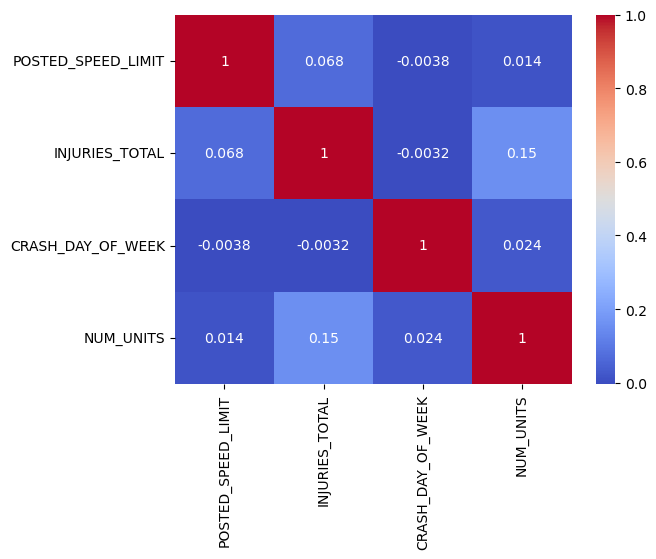

In [226]:
selected_columns = ['POSTED_SPEED_LIMIT', 'INJURIES_TOTAL',
                   'NUM_UNITS',]
subset_df = df[selected_columns]

correlation_matrix = subset_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmax=1)

In [ ]:
#Hit and Runs by Lighting Condition

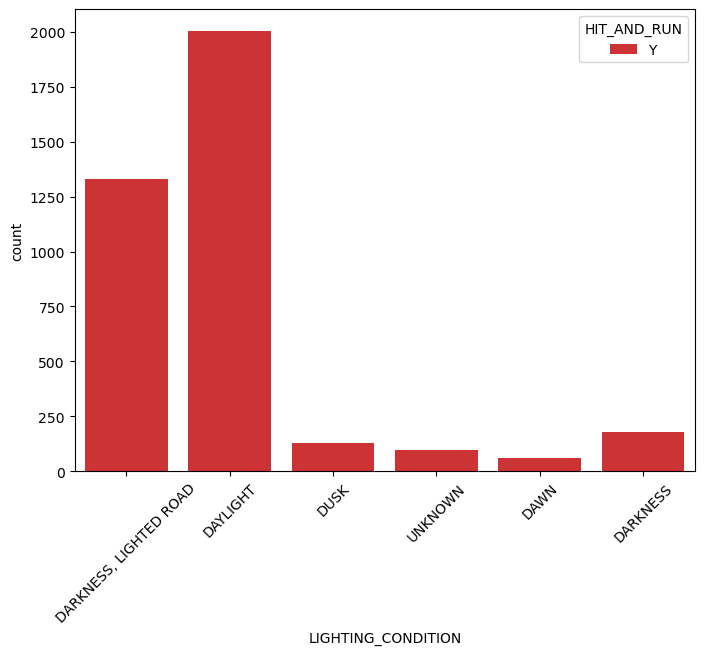

In [239]:
df_Y = df[df['HIT_AND_RUN'] == 'Y']
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_Y, x='LIGHTING_CONDITION', hue='HIT_AND_RUN', palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

The most interesting data to me was that the top cause (excluding unknown)
for crashes with reported injury in 2022 was 'FAILING TO YIELD RIGHT-OF-WAY'.
This could be because a yeild indicates a turn into traffic exposing the side
of the car possibly creating more 'T-Bones' and 'Side-swipes' which are more injury prone that damage to the back of the car.